In [1]:
%load_ext autoreload
%autoreload 2

In [150]:
import folium
import pandas as pd
import matplotlib
import datetime

import myutils
import fingerprint
import matplotlib.pyplot as plt
import numpy as np

In [145]:
df = myutils.load_data()

In [299]:
FAIRVIEW = (41.507198107050016, -81.59662306765496)
HOME = (41.33457093673742, -81.62385471467177)

LOCS = {
    'VEALE': (41.50088049056197, -81.60659853983806),
    'BRECKSVILLE_GYM': (41.31307575839339, -81.62426832077935),
    'JUNKER': (42.12012386684985, -79.97812106494622),
    'BEHREND_SOCCER': (42.12147794810863, -79.97444295440421),
    'ERIE_HALL': (42.120561344495144, -79.9842896355162),
    # 'BEACH_6': (42.14531714162924, -80.13639341333611) # not many instances... bad signal, maybe?
}
COLORS = {
    'VEALE': 'b',
    'BRECKSVILLE_GYM': 'k',
    'JUNKER': 'r',
    'BEHREND_SOCCER': 'g',
    'ERIE_HALL': 'm',
    # 'BEACH_6': 'sandybrown'
}

In [378]:
target_loc = LOCS['VEALE']
target_radius = 75
time_start = '05:30'
time_end = '12:00'
time_min_duration_minutes = 0
# time_max_duration = datetime.timedelta(weeks=1_000_000)

In [555]:
# sessions = {k: fingerprint.get_sessions(df, loc, target_radius, time_min_duration_minutes=time_min_duration_minutes) for k,loc in LOCS.items()}
sessions = {k: fingerprint.get_sessions(df, loc, 75, time_min_duration_minutes=0) for k,loc in LOCS.items()}
datenums = {k: np.unique(matplotlib.dates.date2num((sessions[k]['start_time'])).astype(int)) for k in LOCS}

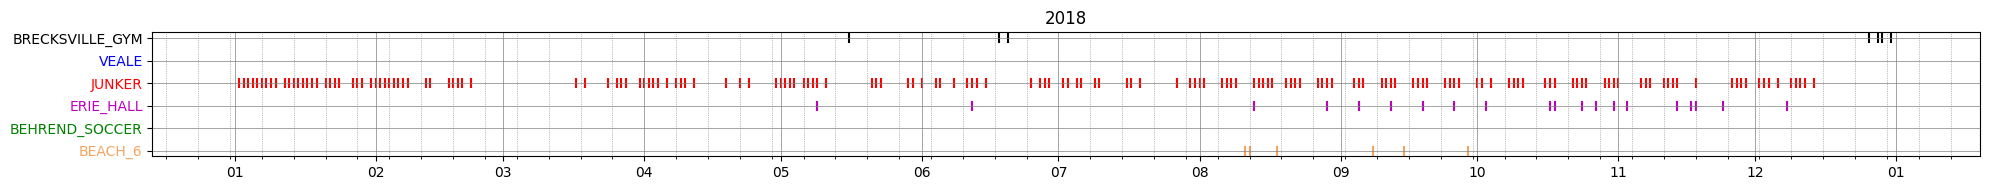

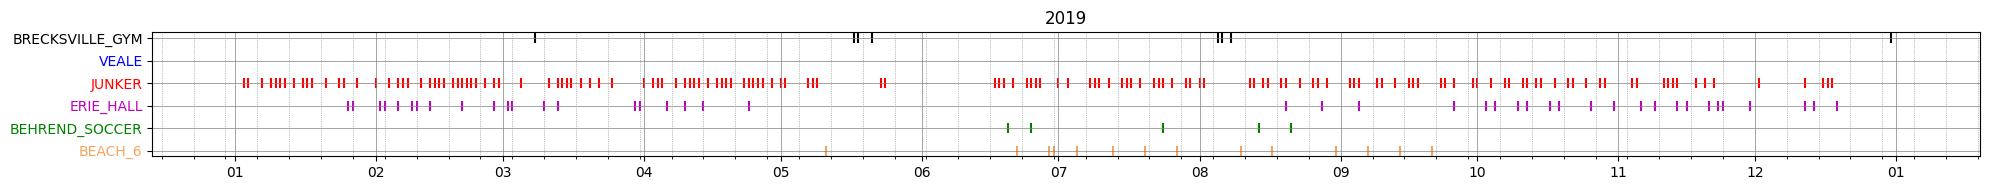

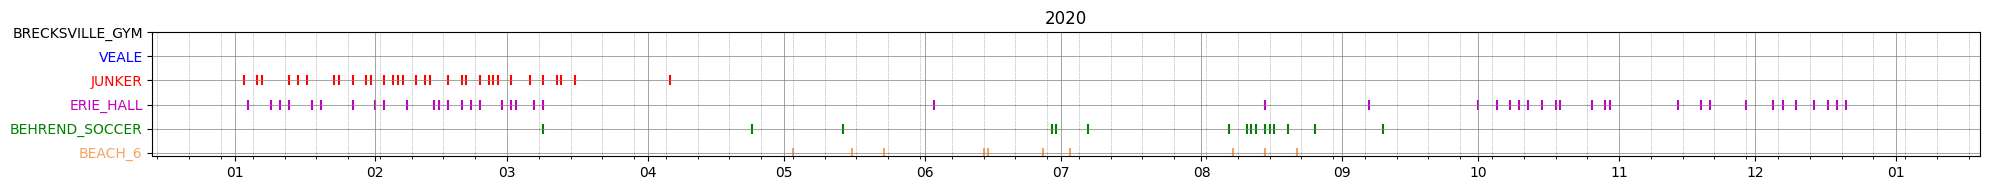

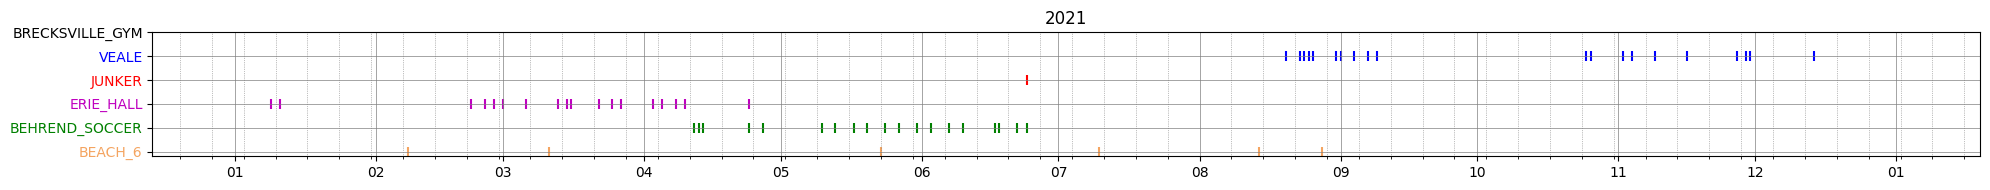

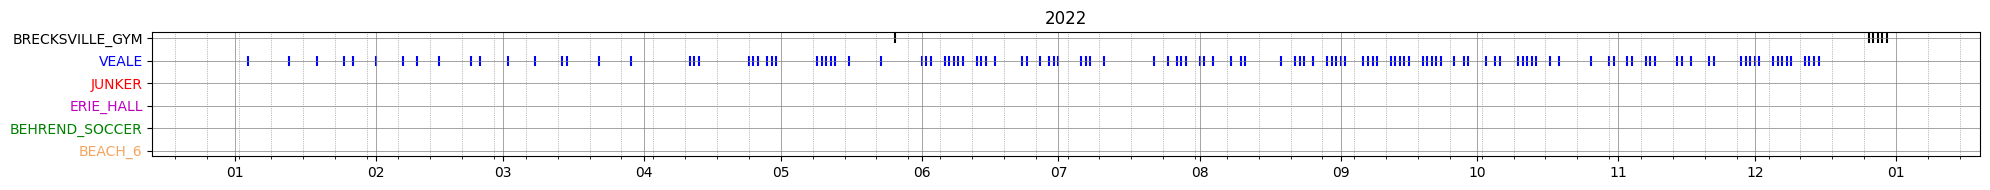

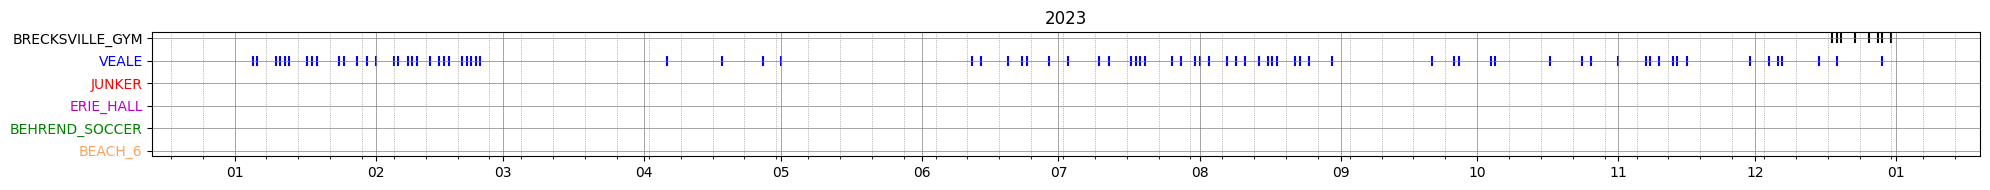

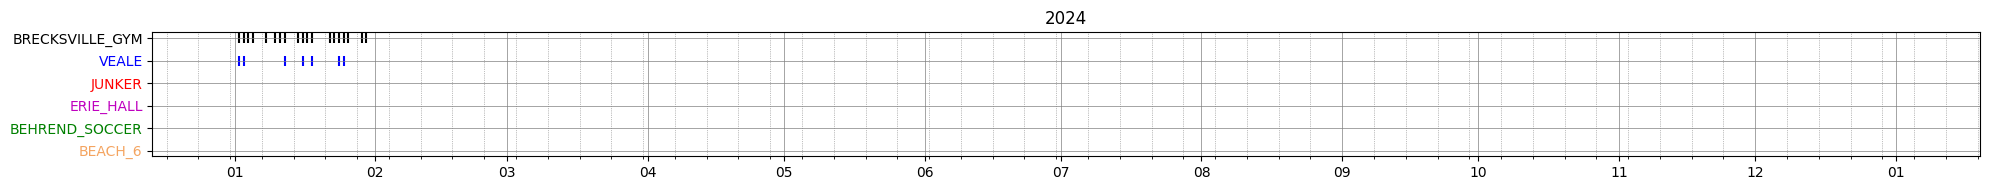

In [573]:
month_current = pd.Timestamp('2018-01-01', tz='America/New_York')
month_end = pd.Timestamp('2024-02-01', tz='America/New_York')
locs_chosen = ['BEACH_6', 'BEHREND_SOCCER', 'ERIE_HALL', 'JUNKER', 'VEALE', 'BRECKSVILLE_GYM']
while month_current <= month_end:
    datenums_current = {k: v[(v >= matplotlib.dates.date2num(month_current)) & (v < matplotlib.dates.date2num(month_current + pd.offsets.YearBegin(1)))] for k,v in datenums.items()}

    # Creating a scatter plot on a number line
    plt.figure(figsize=(20, 2))  # Wide and short figure to represent a number line

    # brecksville_times = brecksville['start_time'].dt.strftime('%#I:%M%p').str.lower().to_list()
    # for i in range(len(brecksville_dates)):
        # plt.annotate(brecksville_times[i], (brecksville_dates[i] - 0.15, 0.02), rotation=60)

    # Formatting the x-axis to show dates
    plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    plt.gca().xaxis.set_minor_locator(matplotlib.dates.WeekdayLocator(byweekday=matplotlib.dates.SU))
    # plt.gca().xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%d'))
    # Formatting the y-axis
    plt.gca().yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
    # Add gridlines for both major and minor x-axis ticks
    plt.gca().xaxis.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray')  # Major gridlines
    plt.gca().xaxis.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')  # Minor gridlines
    # Add gridlines for both major and minor y-axis ticks
    plt.gca().yaxis.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray')  # Major gridlines
    plt.gca().yaxis.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')  # Minor gridlines

    # plt.gcf().autofmt_xdate()  # Rotate date labels to prevent overlap

    [plt.scatter(datenums_current[k], np.ones_like(datenums_current[k]) * i, alpha=1., c=COLORS[k], s=50, marker='|', label=k) for i, k in enumerate(locs_chosen)]
    plt.scatter(matplotlib.dates.date2num(month_current), 0, alpha=0)
    plt.scatter(matplotlib.dates.date2num(month_current + pd.offsets.YearBegin(1)), 0, alpha=0)

    _, yticks = plt.yticks(np.arange(len(locs_chosen)), locs_chosen)
    for ytick in plt.gca().yaxis.get_ticklabels():
        ytick.set_color(COLORS[ytick.get_text()])

    plt.title(f"{month_current.strftime('%Y')}")
    plt.tight_layout()
    # plt.legend(fontsize=7)
    plt.show()
    month_current += pd.offsets.YearBegin(1)


In [355]:
m = folium.Map(LOCS['BEACH_6'], zoom_start=16)
folium.Marker(LOCS['BEACH_6']).add_to(m)
folium.Circle(LOCS['BEACH_6'], radius=target_radius).add_to(m)
for _, row in df[df['near_target']].iterrows():
    folium.Circle((row['lat'], row['long']), radius=0.1, weight=1,).add_to(m)
m